In [2]:
# Load Neccessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import caffe
import num_recog
reload(num_recog)

<module 'num_recog' from 'num_recog.pyc'>

In [3]:
# Load caffe model
caffe.set_mode_cpu()

net = caffe.Net('./model/lenet.prototxt',
                './model/mnist_iter_200000.caffemodel',
               caffe.TEST)

def sort_points(rect):
    x_sort = np.array(sorted(rect, key=lambda x: x[1]))
    if x_sort[0,0] > x_sort[1,0]:
        x_sort[0,0], x_sort[1,0] = swap(x_sort[0,0], x_sort[1,0])
    if x_sort[2,0] > x_sort[3,0]:
        x_sort[2,0], x_sort[3,0] = swap(x_sort[2,0], x_sort[3,0])
    return x_sort

def show(img_obj):
    plt.imshow(img_obj)
    plt.show()

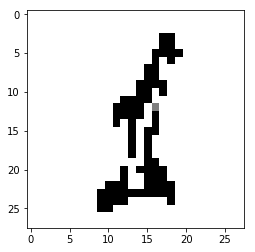

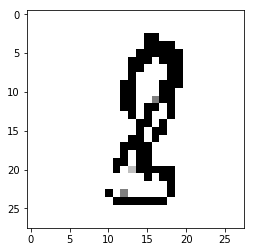

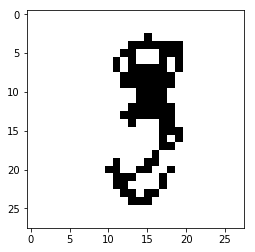

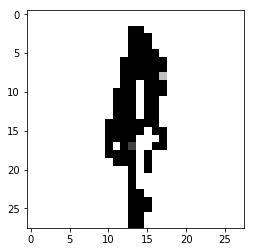

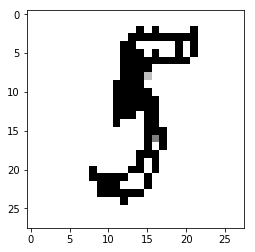

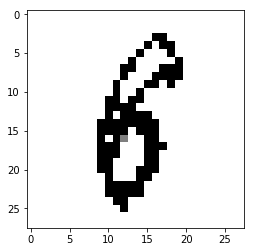

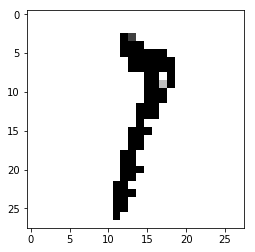

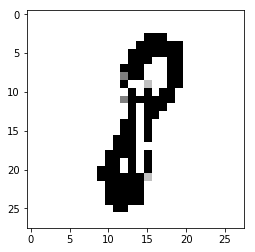

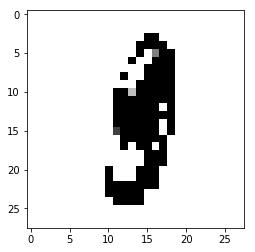

[1 8 3 4 5 8 7 8 3]


In [4]:
BOX_LEN = 32                # bounding box length for digits
offset = (BOX_LEN - 28) / 2 # calculated padding length
# Destination Points
dstpts = np.array([[0,0],[BOX_LEN,0],[0,BOX_LEN],[BOX_LEN,BOX_LEN]], dtype='float32')

bboxs = []
points = []


for i in range(1, 10):
    _test = cv2.imread(str(i) + ".jpg", 0)
    _, _test = cv2.threshold(_test,125,255,cv2.THRESH_BINARY)
    kernel = np.ones((20, 12), np.uint8)
    _test = cv2.erode(_test, kernel, iterations = 1)
    # Sort points with respect to relative location
    pts1 = np.array([[0, 0], [1400, 0], [0, 800], [1400, 800]], np.float32)
    points.append(pts1)
    M = cv2.getPerspectiveTransform(pts1,dstpts)
    new_img = cv2.warpPerspective(_test,M,(BOX_LEN,BOX_LEN))
    new_img = 255 - new_img[offset:-offset, offset:-offset]
    #new_img = cv2.morphologyEx(new_img, cv2.MORPH_CLOSE, np.array([5 , 5], np.uint8))
    bboxs.append(new_img)
    plt.imshow(bboxs[-1], cmap='gray')
    plt.show()
    

bboxs = np.array(bboxs)[:, None,...]
net.blobs['data'].reshape(bboxs.shape[0], 1, 28, 28)
net.blobs['data'].data[...] = bboxs.astype('float32') / 255
out = net.forward()
dig_ids = out['prob'].argmax(axis = 1)
print dig_ids

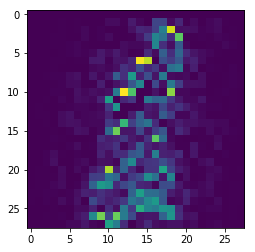

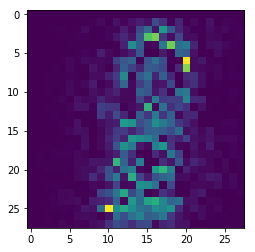

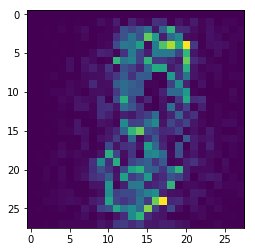

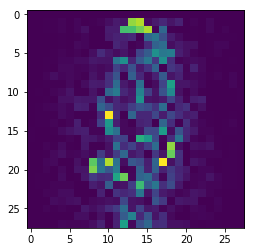

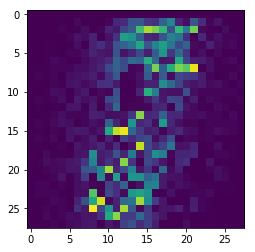

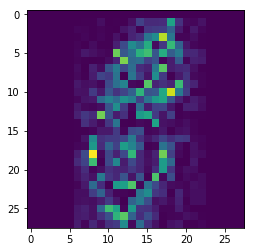

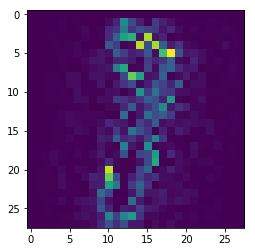

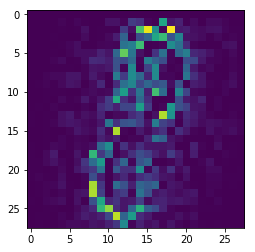

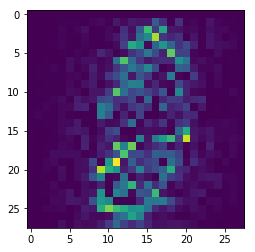

In [5]:
for i in range(1, 10):
    _test = cv2.imread(str(i) + ".jpg", 0)
    pts1 = np.array([[0, 0], [1400, 0], [0, 800], [1400, 800]], np.float32)
    points.append(pts1)
    M = cv2.getPerspectiveTransform(pts1,dstpts)
    new_img = cv2.warpPerspective(_test,M,(BOX_LEN,BOX_LEN))
    new_img = 255 - new_img[offset:-offset, offset:-offset]
    kernel = np.array([3, 3], np.uint8)
    gradient = cv2.morphologyEx(new_img, cv2.MORPH_GRADIENT, kernel)
    show(gradient)

In [6]:
cap = cv2.VideoCapture('./5.mp4')
fourcc = cv2.VideoWriter_fourcc(*'MP4v')
out = cv2.VideoWriter('./out.mp4', fourcc, 25, (28, 28))
while True:
    ret, img = cap.read()
    if not ret: break
    _test = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, _test = cv2.threshold(_test,125,255,cv2.THRESH_BINARY)
    kernel = np.ones((20, 12), np.uint8)
    _test = cv2.erode(_test, kernel, iterations = 1)
    # Sort points with respect to relative location
    pts1 = np.array([[0, 0], [1400, 0], [0, 800], [1400, 800]], np.float32)
    points.append(pts1)
    M = cv2.getPerspectiveTransform(pts1,dstpts)
    new_img = cv2.warpPerspective(_test,M,(BOX_LEN,BOX_LEN))
    new_img = 255 - new_img[offset:-offset, offset:-offset]
    out.write(new_img)
    #show(new_img)
    cv2.imshow('out', new_img)
    key = cv2.waitKey(0)
    if key & 0xFF == ord('q'):
        cap.release()
        break
    #show(gradient)

cap.release()
out.release()